17.32 Optimizing the sequence of commitments in an alternative investment

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
T = 40 
r = 0.04
gamma_call = 0.23
gamma_dist = 0.15
c_max = 4
p_max = 3
B = 85
n_des = 15
Lambda = 5

In [22]:
n = cp.Variable(T+1, nonneg=True)
u = cp.Variable(T+1, nonneg=True)
c = cp.Variable(T, nonneg=True)
d = cp.Variable(T, nonneg=True)
p = cp.Variable(T, nonneg=True)
objective = cp.Minimize(1 / (T+1) * cp.sum_squares(n - n_des) + Lambda / (T-1) * cp.sum_squares(c[1:] - c[:-1]))
constraints = [
    c <= c_max,
    p <= p_max,
    cp.sum(c) <= B,
    n[0] == 0,
    u[0] == 0,
    p == gamma_call * u[:-1],
    d == gamma_dist * n[:-1],
    n[1:] == (1+r) * n[:-1] + p - d,
    u[1:] == u[:-1] - p + c
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print('RMS tracking error:', np.sqrt(np.mean((n.value - n_des)**2)))

RMS tracking error: 5.083869068895226


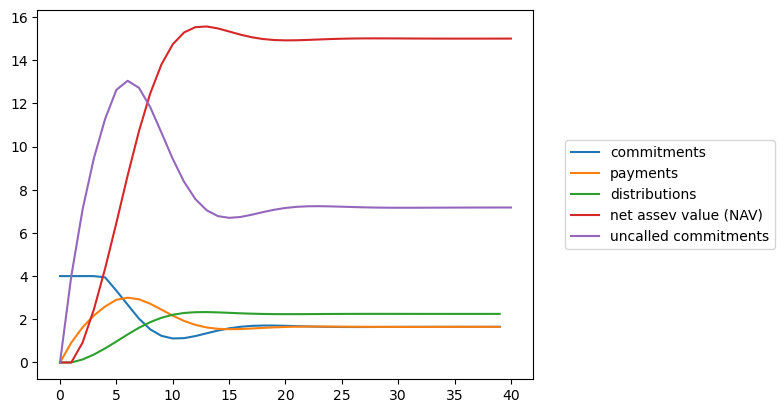

In [17]:
plt.plot(c.value, label='commitments')
plt.plot(p.value, label='payments')
plt.plot(d.value, label='distributions')
plt.plot(n.value, label='net assev value (NAV)')
plt.plot(u.value, label='uncalled commitments')
plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()

RMS tracking error for constant commitment: 6.856700870342665


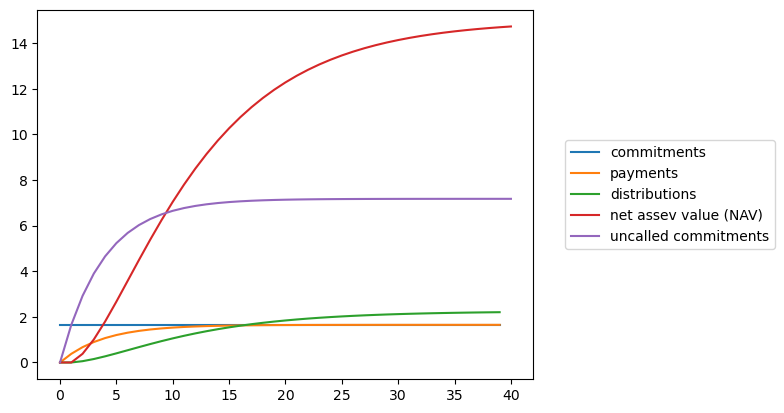

In [21]:
# constant commitment based on steady-state
c_ss = (gamma_dist - r) * n_des

n = cp.Variable(T+1, nonneg=True)
u = cp.Variable(T+1, nonneg=True)
c = cp.Variable(T, nonneg=True)
d = cp.Variable(T, nonneg=True)
p = cp.Variable(T, nonneg=True)
objective = cp.Minimize(1 / (T+1) * cp.sum_squares(n - n_des) + Lambda / (T-1) * cp.sum_squares(c[1:] - c[:-1]))
constraints = [
    c == c_ss,
    c <= c_max,
    p <= p_max,
    cp.sum(c) <= B,
    n[0] == 0,
    u[0] == 0,
    p == gamma_call * u[:-1],
    d == gamma_dist * n[:-1],
    n[1:] == (1+r) * n[:-1] + p - d,
    u[1:] == u[:-1] - p + c
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print('RMS tracking error for constant commitment:', np.sqrt(np.mean((n.value - n_des)**2)))
plt.plot(c.value, label='commitments')
plt.plot(p.value, label='payments')
plt.plot(d.value, label='distributions')
plt.plot(n.value, label='net assev value (NAV)')
plt.plot(u.value, label='uncalled commitments')
plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()